In [116]:
#Required modules
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import pandas as pd
import re


In [320]:
# This file contains the name of the product, its id, its link and the id of the categories attributed to it
products = pd.read_excel('/home/erq/Desktop/Divento/classify/Net products.xlsx')
products.reset_index(drop=True,inplace=True)
products.drop('Unnamed: 0',axis=1,inplace=True)
products.head()

,Places,ID,links,Categories
0,"Mozart Dinner Concert, Baroque Hall, Salzburg:...",106,https://www.divento.com/en/country/106-mozart-...,794
1,"Morning Exercise, The Spanish Riding School, V...",127,https://www.divento.com/en/vienna/127-morning-...,"792, 794, 1219, 2064"
2,"The Last Supper - Leonardo Da Vinci, Santa Mar...",368,https://www.divento.com/en/italy/368-the-last-...,"1219, 1757"
3,"Leopold Museum, Vienna: All Year",445,https://www.divento.com/en/country/445-leopold...,"1219, 1757"
4,THE THEATRE MUSEUM: all year,601,https://www.divento.com/en/601-the-theatre-mus...,792


In [325]:
# After using selenium to scrape the text of each of those links the following file was cerated
raw_text = pd.read_excel('more_data.xlsx')
raw_text.reset_index(drop=True,inplace=True)
raw_text.drop('Unnamed: 0',axis=1,inplace=True)
raw_text['text'][0]

'Mozart Dinner Concert, Baroque Hall, Salzburg: All Year No music-lover should turn down an opportunity to visit \xa0the "great musical city" of Salzburg. And for Mozart enthusiasts there\'s an obvious added interest in the town of his birth. These \xa0dinner concerts which are held at the \xa0famous Siftskeller St. Peter restaurant add a special flavour to anyone\'s visit. A traditional menu of Mozart\'s time, with dishes like Poularde in der Betramsoss (chicken with cress sauce, truffled rice and fresh vegetables), is served by candlelight to the sounds of the \xa0Amadeus Consort Salzburg \xa0( dressed in 18th century costume, naturally) playing music from The Magic Flute, Don Giovanni and other favourites. '

In [122]:
len(raw_text)

3689

In [326]:
# Add the raw text to the dataframe.
sample = (raw_text[:]) # This was necessary when only a sample of texts was available
Sample_Products = products[:] #change the limit the amount of products as you increase raw_text
Sample_Products['Text'] = raw_text[:]
Sample_Products.head()



/home/erq/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Places,ID,links,Categories,Text
0,"Mozart Dinner Concert, Baroque Hall, Salzburg:...",106,https://www.divento.com/en/country/106-mozart-...,794,"Mozart Dinner Concert, Baroque Hall, Salzburg:..."
1,"Morning Exercise, The Spanish Riding School, V...",127,https://www.divento.com/en/vienna/127-morning-...,"792, 794, 1219, 2064","Morning Exercise, The Spanish Riding School, V..."
2,"The Last Supper - Leonardo Da Vinci, Santa Mar...",368,https://www.divento.com/en/italy/368-the-last-...,"1219, 1757","The Last Supper - Leonardo Da Vinci, Santa Mar..."
3,"Leopold Museum, Vienna: All Year",445,https://www.divento.com/en/country/445-leopold...,"1219, 1757","Leopold Museum, Vienna: All Year When Rudolph ..."
4,THE THEATRE MUSEUM: all year,601,https://www.divento.com/en/601-the-theatre-mus...,792,THE THEATRE MUSEUM: all year Norway’s most not...


In [155]:
#This assigns the category to each category ID and creates a df with the required format for text classification
Sample_Data = pd.DataFrame()
Sample_Data['ID'] = Sample_Products['ID']
Sample_Data['Text'] = Sample_Products['Text']
Sample_Data['Category'] = Sample_Products['Categories']
Sample_Data

Whats_hot = []
Performing_Arts = []
Famous_Places = []
Eating_and_Drinking = [] 
Arts_and_Culture = []
Hidden_Gems = []
Family = []
Parks_and_Gardens = []
Historic_Houses_and_Sites = []
    
for i in range(len(Sample_Data['Category'])):
    
           
    if '792' in Sample_Data['Category'][i]:

        Whats_hot.append(1)
    
    else: Whats_hot.append(0)
  
    if '794' in Sample_Data['Category'][i]:

        Performing_Arts.append(1)
    
    else: Performing_Arts.append(0)

    if '1219' in Sample_Data['Category'][i]:

        Famous_Places.append(1)
    
    else: Famous_Places.append(0)  
    
    if '1312' in Sample_Data['Category'][i]:

        Eating_and_Drinking.append(1)
    
    else: Eating_and_Drinking.append(0)  
    
    if '1757' in Sample_Data['Category'][i]:

        Arts_and_Culture.append(1)
    
    else: Arts_and_Culture.append(0)  
        
    if '2062' in Sample_Data['Category'][i]:

        Hidden_Gems.append(1)
    
    else: Hidden_Gems.append(0)  
        
    if '2064' in Sample_Data['Category'][i]:

        Family.append(1)
    
    else: Family.append(0)  
        
    if '2065' in Sample_Data['Category'][i]:

        Parks_and_Gardens.append(1)
    
    else: Parks_and_Gardens.append(0)  
        
    if '2233' in Sample_Data['Category'][i]:

        Historic_Houses_and_Sites.append(1)
    
    else: Historic_Houses_and_Sites.append(0)  
    

Sample_Data['Whats_hot'] = Whats_hot[:]
Sample_Data['Performing_Arts'] = Performing_Arts[:]
Sample_Data['Famous_Places'] = Famous_Places[:]
Sample_Data['Eating_and_Drinking'] = Eating_and_Drinking[:] 
Sample_Data['Arts_and_Culture'] = Arts_and_Culture[:]
Sample_Data['Hidden_Gems'] = Hidden_Gems[:]
Sample_Data['Family'] = Family[:]
Sample_Data['Parks_and_Gardens'] = Parks_and_Gardens[:]
Sample_Data['Historic_Houses_and_Sites'] = Historic_Houses_and_Sites[:]

Sample_Data.drop('Category', axis=1,inplace=True)

# Let's clean the text defining a funciton of regular expressions.

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

# Apply the function to the text 

Sample_Data['Text'] = Sample_Data['Text'].map(lambda desc : clean_text(desc))


In [327]:
# Drops blanks
Sample_Data = Sample_Data[Sample_Data.Text != '']
Sample_Data.reset_index(drop=True,inplace=True)


In [319]:
# Saves the data ready to be trained
Sample_Data.to_excel("Data_Text_Train.xlsx")

In [311]:
#Train/test split

train, test = train_test_split(Sample_Data, random_state=42, test_size=0.33, shuffle=True)

X_train = train.Text
X_test = test.Text
print(X_train.shape)
print(X_test.shape)
categories = 'Whats_hot', 'Performing_Arts', 'Famous_Places', 'Eating_and_Drinking', 'Arts_and_Culture', 'Hidden_Gems', 'Family', 'Parks_and_Gardens', 'Historic_Houses_and_Sites'

(2386,)
(1176,)


In [329]:
X_test[0]

'mozart dinner concert baroque hall salzburg all year no music lover should turn down an opportunity to visit the great musical city of salzburg and for mozart enthusiasts there an obvious added interest in the town of his birth these dinner concerts which are held at the famous siftskeller st peter restaurant add a special flavour to anyone visit a traditional menu of mozart time with dishes like poularde in der betramsoss chicken with cress sauce truffled rice and fresh vegetables is served by candlelight to the sounds of the amadeus consort salzburg dressed in 18th century costume naturally playing music from the magic flute don giovanni and other favourites'

In [313]:
# OneVsRestClassifier is used along with the TfidfVectorizer

text_classif = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    text_classif.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = text_classif.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Whats_hot
Test accuracy is 0.9574829931972789
... Processing Performing_Arts
Test accuracy is 0.9761904761904762
... Processing Famous_Places
Test accuracy is 0.8324829931972789
... Processing Eating_and_Drinking
Test accuracy is 0.9472789115646258
... Processing Arts_and_Culture
Test accuracy is 0.8154761904761905
... Processing Hidden_Gems
Test accuracy is 0.9268707482993197
... Processing Family
Test accuracy is 0.8724489795918368
... Processing Parks_and_Gardens
Test accuracy is 0.9472789115646258
... Processing Historic_Houses_and_Sites
Test accuracy is 0.9421768707482994


In [163]:
# Confusino matrix
print(metrics.confusion_matrix(test[category],prediction)) 

[[931  19]
 [ 48 178]]


In [193]:
from sklearn import metrics
print(metrics.classification_report(test[category],prediction))

#The model seems to be pretty precise with a good recall rate, in this case, recall is more important than precision,
# because in this case, type I error is preferable, that is I would rather assign a worng label to a product 
#rather than not assigning one.

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       969
           1       0.90      0.76      0.82       207

    accuracy                           0.94      1176
   macro avg       0.92      0.87      0.89      1176
weighted avg       0.94      0.94      0.94      1176



In [199]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Whats_hot
Test accuracy is 0.9421768707482994
... Processing Performing_Arts
Test accuracy is 0.9472789115646258
... Processing Famous_Places
Test accuracy is 0.8188775510204082
... Processing Eating_and_Drinking
Test accuracy is 0.9251700680272109
... Processing Arts_and_Culture
Test accuracy is 0.8290816326530612
... Processing Hidden_Gems
Test accuracy is 0.9277210884353742
... Processing Family
Test accuracy is 0.8554421768707483
... Processing Parks_and_Gardens
Test accuracy is 0.9370748299319728
... Processing Historic_Houses_and_Sites
Test accuracy is 0.9362244897959183


In [202]:
from sklearn import metrics
print(metrics.classification_report(test[category],prediction))

#This model is more precise but has a lower recall rate, which is not desireble as I am not very concerned with 
#false positives

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       969
           1       0.95      0.67      0.79       207

    accuracy                           0.94      1176
   macro avg       0.94      0.83      0.88      1176
weighted avg       0.94      0.94      0.93      1176



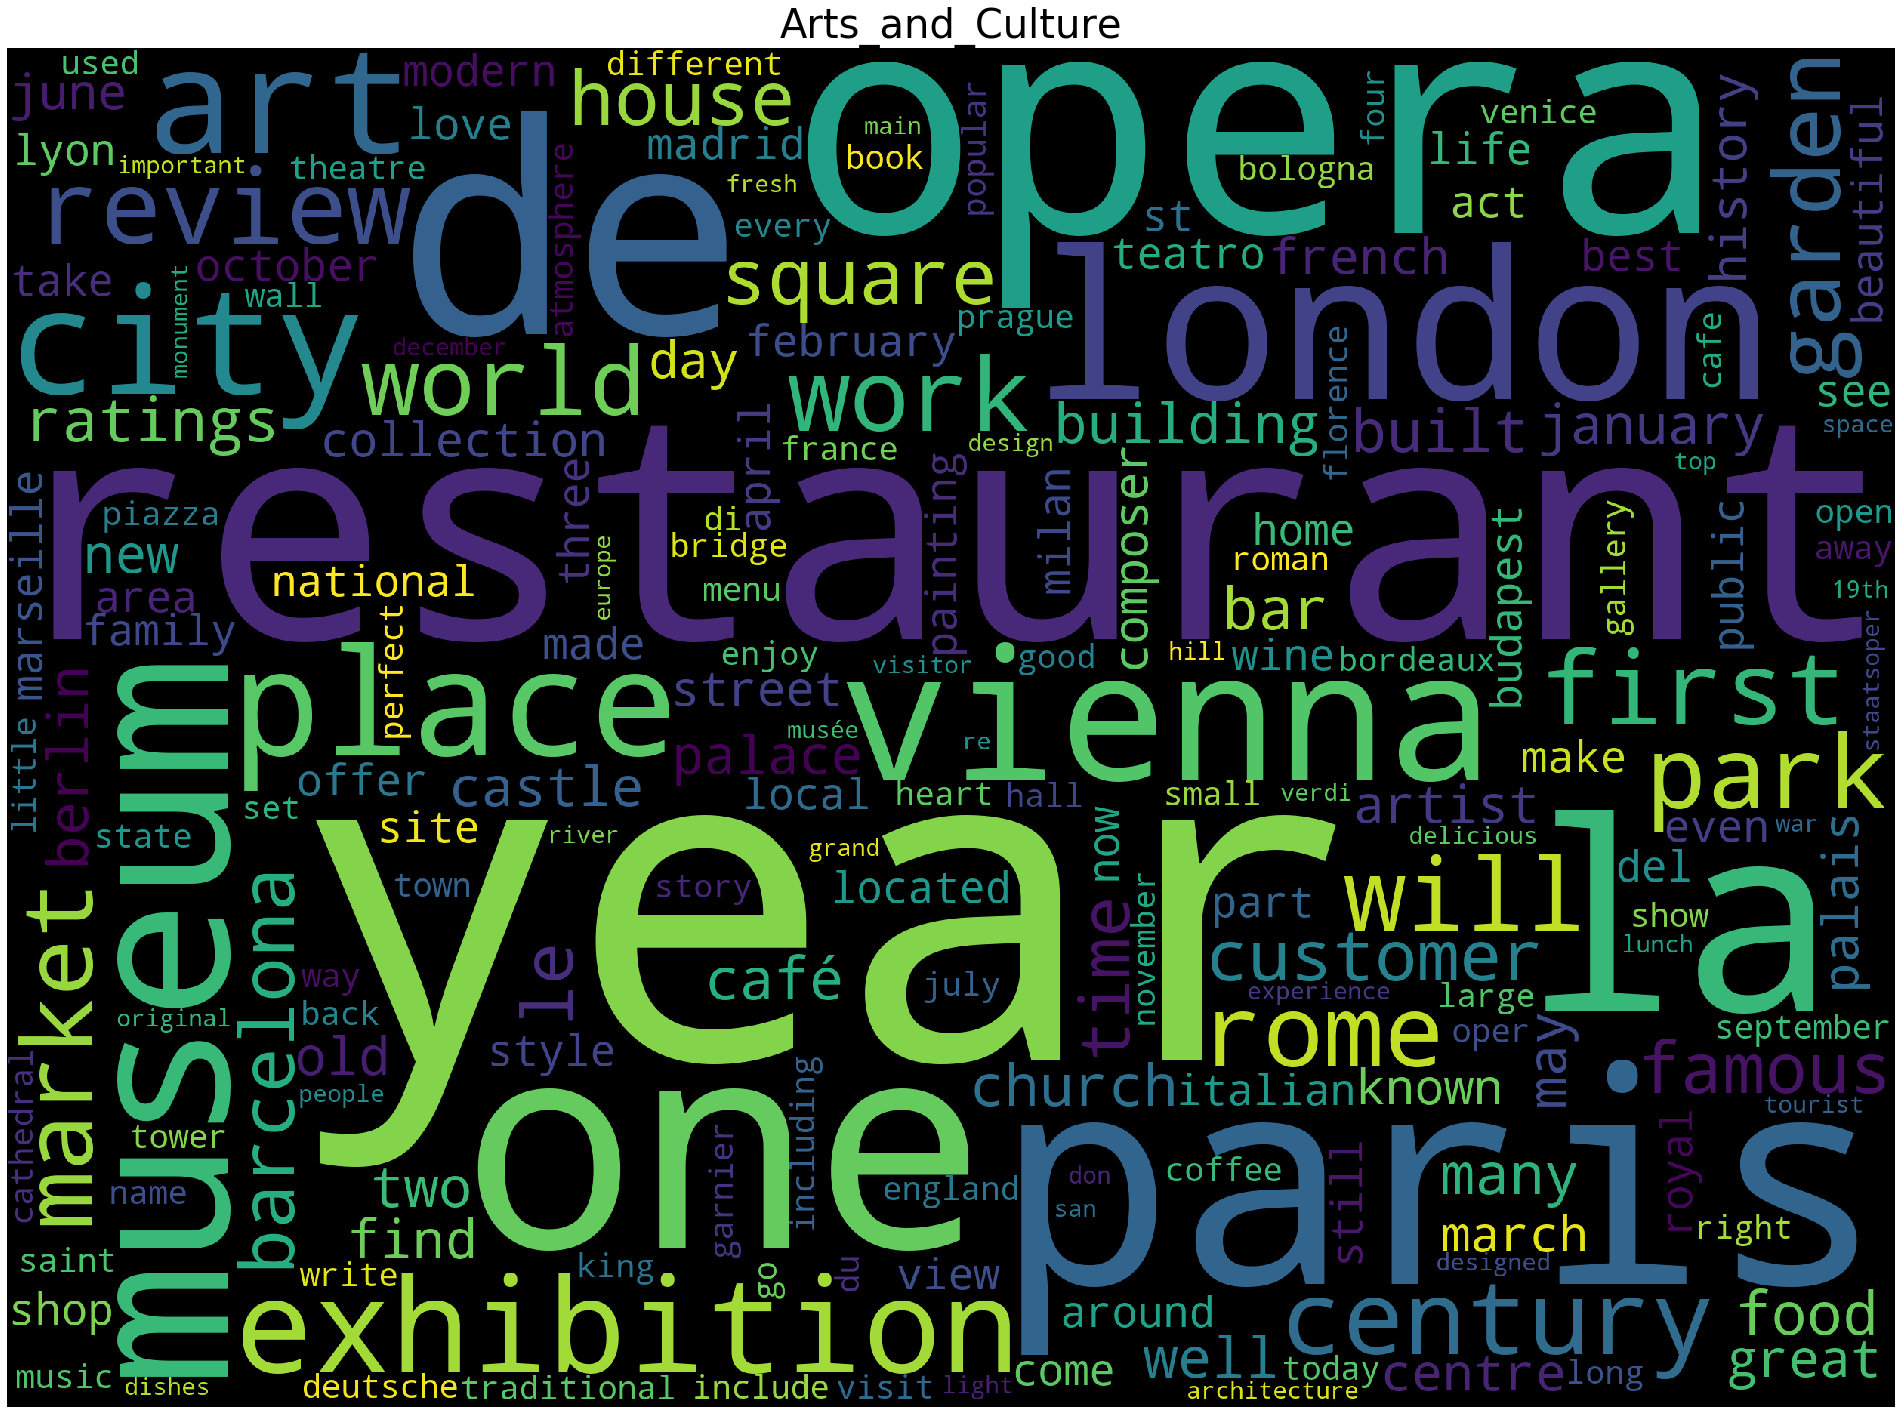

In [201]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize=(40,25))
# clean
#Sample_Data = Sample_Data[Sample_Data.Text != '']

subset = Sample_Data[Sample_Data.Arts_and_Culture == 0]
text = subset.Text.values
Arts_and_Culture = WordCloud(
stopwords=STOPWORDS,
background_color='black',
collocations=False,
width=2500,
height=1800).generate(" ".join(text))
plt.axis('off')
plt.title("Arts_and_Culture",fontsize=40)
plt.imshow(Arts_and_Culture)

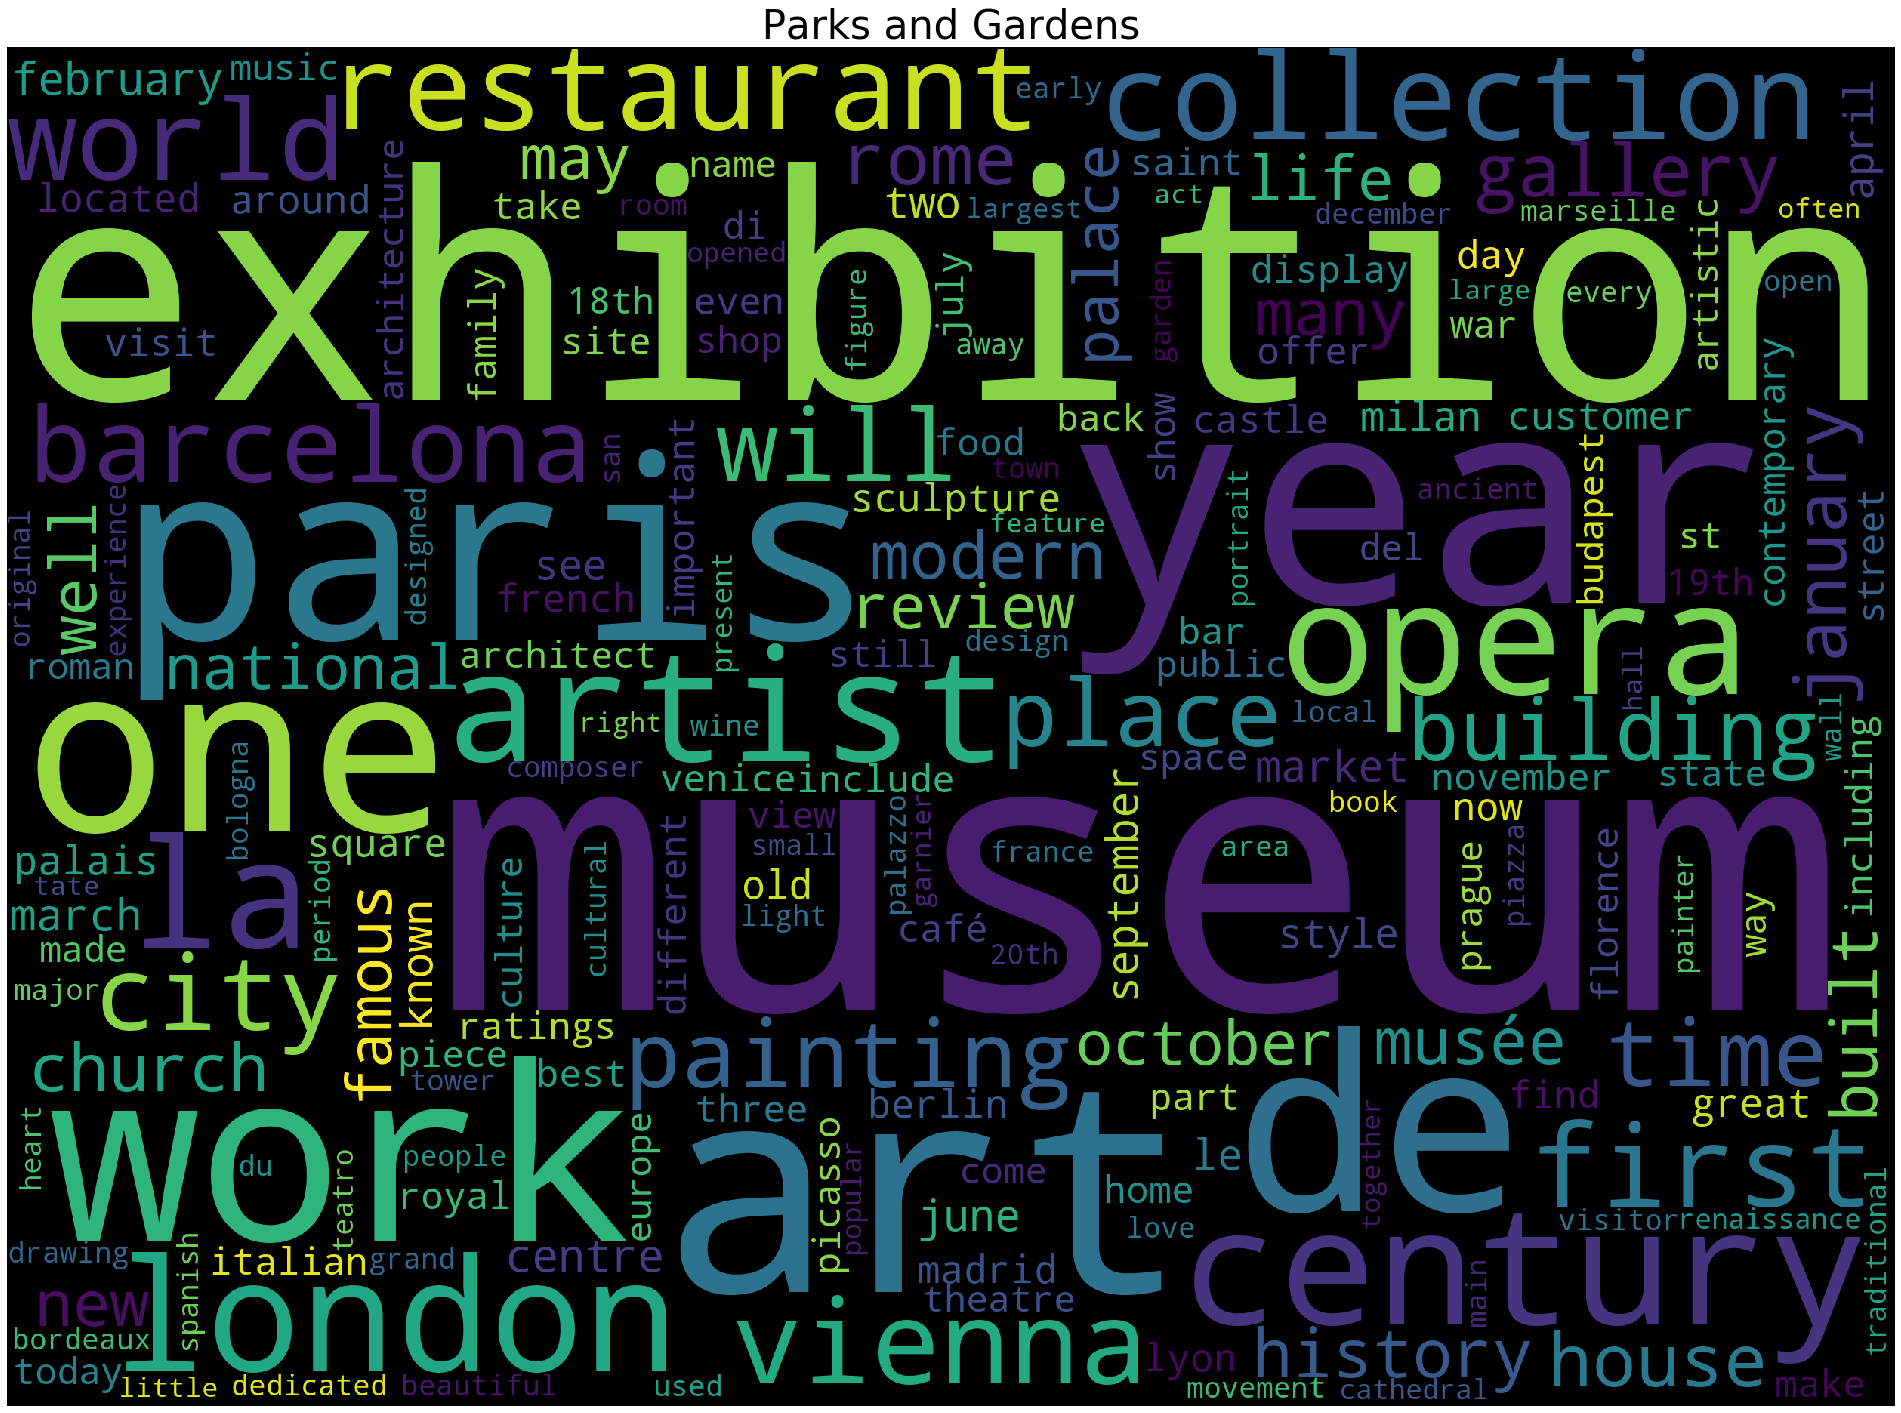

In [198]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize=(40,25))
# clean
#Sample_Data = Sample_Data[Sample_Data.Text != '']

subset = Sample_Data[Sample_Data.Parks_and_Gardens == 0]
text = subset.Text.values
Parks_and_Gardens = WordCloud(
stopwords=STOPWORDS,
background_color='black',
collocations=False,
width=2500,
height=1800).generate(" ".join(text))
plt.axis('off')
plt.title("Parks and Gardens",fontsize=40)
plt.imshow(Parks_and_Gardens)